In [1]:
import numerical_methods as NumMeth
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problema 1

In [2]:
def F(x: np.array) -> np.array:
    return np.array([
        10*x[0] + np.sin(x[1]+x[2]) - 1, 
        8*x[1] - np.cos(x[2]-x[1])**2 - 1, 
        12*x[2] + np.sin(x[2]) - 1
        ])
    
def JF(x: np.array) -> np.array:
    return np.array([
        [10+np.cos(x[0] + x[1]), np.cos(x[0] + x[1]), 0],
        [0, 8-2*np.cos(x[2]-x[1])*np.sin(x[2]-x[1]), 2*np.cos(x[2]-x[1])*np.sin(x[2]-x[1])],
        [0, 0, 12+np.cos(x[2])]
    ])
    
iterados = []
raiz = NumMeth.MetodoNewtonMultivariado(F, JF, np.array([0,0,0]), 1e-6, iterates=iterados)
raiz

array([0.06822349, 0.24644242, 0.07692891])

In [3]:
F(raiz)

array([-1.89676443e-07, -3.33066907e-16,  0.00000000e+00])

In [4]:
pd.DataFrame({"x": [f"{x[0]:.8f}" for x in iterados], "y": [f"{x[1]:.8f}" for x in iterados], "z": [f"{x[2]:.8f}" for x in iterados]})

,x,y,z
0,0.00000000,0.00000000,0.00000000
1,0.06818182,0.25000000,0.07692308
2,0.06822098,0.24644385,0.07692891
3,0.06822329,0.24644242,0.07692891
4,0.06822349,0.24644242,0.07692891


### Problema 2

Inciso a)

In [5]:
A = np.array([
    [5.5, 0, 0, 0, 0, 3.5],
    [0, 5.5, 0, 0, 0, 1.5],
    [0, 0, 6.5, 0, 3.75, 0],
    [0, 0, 0, 5.5, 0, 0.5],
    [0, 0, 3.75, 0, 6.25, 0],
    [3.5, 1.5, 0, 0.5, 0, 5.5]
])
b = np.array([1, 1, 1, 1, 1, 1])
sol = NumMeth.solveByGaussianElimination(A, b)
sol

array([1.81818182e-01, 1.81818182e-01, 9.41176471e-02, 1.81818182e-01,
       1.03529412e-01, 9.84875264e-18])

In [6]:
A@sol

array([1., 1., 1., 1., 1., 1.])

Inciso b)

In [7]:
L, U = NumMeth.FactorizacionLU(A)
D = np.diag(U.diagonal())
D_sqrt = np.diag([uii**0.5 for uii in D.diagonal()])
L_chol = L@D_sqrt
pd.DataFrame(L_chol)

,0,1,2,3,4,5
0,2.345208,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,2.345208,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,2.549510,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,2.345208,0.000000,0.000000
4,0.000000,0.000000,1.470871,0.000000,2.021519,0.000000
5,1.492405,0.639602,0.000000,0.213201,0.000000,1.678744


In [8]:
pd.DataFrame(L_chol.T)

,0,1,2,3,4,5
0,2.345208,0.000000,0.00000,0.000000,0.000000,1.492405
1,0.000000,2.345208,0.00000,0.000000,0.000000,0.639602
2,0.000000,0.000000,2.54951,0.000000,1.470871,0.000000
3,0.000000,0.000000,0.00000,2.345208,0.000000,0.213201
4,0.000000,0.000000,0.00000,0.000000,2.021519,0.000000
5,0.000000,0.000000,0.00000,0.000000,0.000000,1.678744


In [9]:
L_chol@L_chol.T

array([[5.5 , 0.  , 0.  , 0.  , 0.  , 3.5 ],
       [0.  , 5.5 , 0.  , 0.  , 0.  , 1.5 ],
       [0.  , 0.  , 6.5 , 0.  , 3.75, 0.  ],
       [0.  , 0.  , 0.  , 5.5 , 0.  , 0.5 ],
       [0.  , 0.  , 3.75, 0.  , 6.25, 0.  ],
       [3.5 , 1.5 , 0.  , 0.5 , 0.  , 5.5 ]])

Inciso c)

In [10]:
eig_vals = NumMeth.MetodoPotenciaConHouseholder(A)
eig_vals

array([10.12708275,  9.34057287,  5.5       ,  5.5       ,  2.62291724,
        1.65942713])

$\rho(A)\rho(A^{-1}) = \frac{|\lambda_{max}|}{|\lambda_{min}|} \leq ||A||\cdot ||A^{-1}|| = k(A)$

In [11]:
# aproximación a número de condición de A
10.12708275/1.65942713

6.102758335643216

In [28]:
np.random.seed(0)
x_init = np.random.rand(len(A))
eig_vecs = []
for eig in eig_vals:
    eig1, eig_vec = NumMeth.MetodoPotenciaInversaDesplazamiento(A, x_init, p=eig+1e-5)
    eig_vecs.append(eig_vec)

for i, (eig, eig_vec)in enumerate(zip(eig_vals, eig_vecs)):
    print(f"{i+1}) eigenvalor:", eig)
    print("eigenvector:", eig_vec, "\n")

1) eigenvalor: 10.127082754830809
eigenvector: [1.50160889e-10 6.74349427e-11 7.18788853e-01 2.44451807e-11
 6.95228441e-01 1.65973406e-10] 

2) eigenvalor: 9.340572874035589
eigenvector: [-6.44401791e-01 -2.76173377e-01  6.17449639e-06 -9.20585466e-02
  6.19630924e-06 -7.07106655e-01] 

3) eigenvalor: 5.499999999981878
eigenvector: [-3.63877968e-01  6.16225625e-01  5.47845758e-12  6.98468900e-01
  2.20193245e-12  7.04464519e-12] 

4) eigenvalor: 5.499999999993255
eigenvector: [-3.63877968e-01  6.16225625e-01  5.47847005e-12  6.98468900e-01
  2.20193746e-12  7.04466122e-12] 

5) eigenvalor: 2.622917244993065
eigenvector: [ 7.69758940e-11  8.36144367e-11  6.95228441e-01  6.01972086e-11
 -7.18788853e-01 -8.16954588e-11] 

6) eigenvalor: 1.6594271261654072
eigenvector: [ 6.44402233e-01  2.76172385e-01  6.43635362e-11  9.20574618e-02
 -5.64487800e-11 -7.07106781e-01] 



### Problema 3

Inciso a)

$p(x) = f(x_0) + \sum_{k=1}^5 f[x_0, \ldots, x_k] \prod_{j=0}^{k-1}(x-x_j)$

In [61]:
m_arr = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])
Em_arr = np.array([1.57080, 1.53076, 1.48904, 1.44536, 1.39939, 1.35064])
polinomio = NumMeth.PolinomioNewton(m_arr, Em_arr)
dif_div = polinomio.fit() # diferencias divididas
for i, coef in enumerate(dif_div):
    print(f"f{['x_'+str(j) for j in range(i+1)]} = {coef}")

f['x_0'] = 1.5708
f['x_0', 'x_1'] = -0.40040000000000076
f['x_0', 'x_1', 'x_2'] = -0.08399999999999519
f['x_0', 'x_1', 'x_2', 'x_3'] = -0.04666666666667823
f['x_0', 'x_1', 'x_2', 'x_3', 'x_4'] = -0.020833333333356227
f['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5'] = -0.09166666666627801


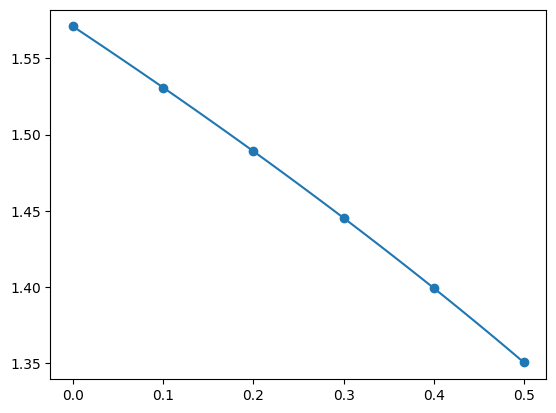

In [15]:
x_axis = np.linspace(0, 0.5, 50)
plt.scatter(m_arr, Em_arr)
plt.plot(x_axis, [polinomio.evaluate(x0) for x0 in x_axis])

In [34]:
a, b = 5, 4
(a**2 - b**2)/(a**2)

0.36

In [35]:
L = polinomio.evaluate(0.36)*4*a
L

28.3615858944

In [60]:
(0.36-m_arr).prod()/(6*5*4*3*2) # error salvo factor E^{(6)}

6.988800000000005e-09

Inciso b)

In [36]:
def g(omega: float) -> float:
    a, b = 5, 4
    m = (a**2 - b**2)/(a**2)
    return (1-m*np.sin(omega)**2)**0.5

In [74]:
n = 41
xis = np.linspace(0, np.pi/2, n)
yis = np.array([g(xi) for xi in xis])
I = NumMeth.IntegracionSimpson(xis, yis)
L1 = I*4*a
L1

28.361667888974477

In [76]:
h = (np.pi/2)/(n-1)
(np.pi/2)/180*h**2

1.3457585364713461e-05